Saving PCM_14052025.shapiro-wilk.csv to PCM_14052025.shapiro-wilk.csv


<ipython-input-1-0cb084213181>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')



--- Type of the building ---
Shapiro-Wilk statistic = 0.7856, p-value = 1.366e-05
Not normally distributed (p <= 0.05).


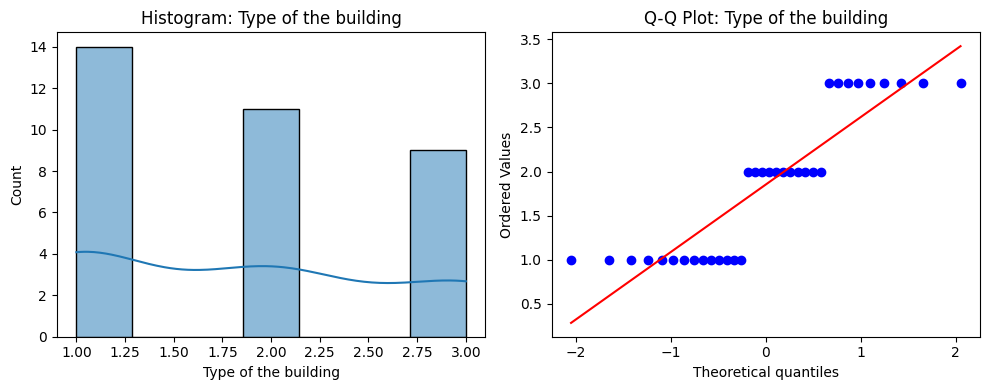


--- Size [m2] ---
Shapiro-Wilk statistic = 0.7229, p-value = 1.127e-06
Not normally distributed (p <= 0.05).


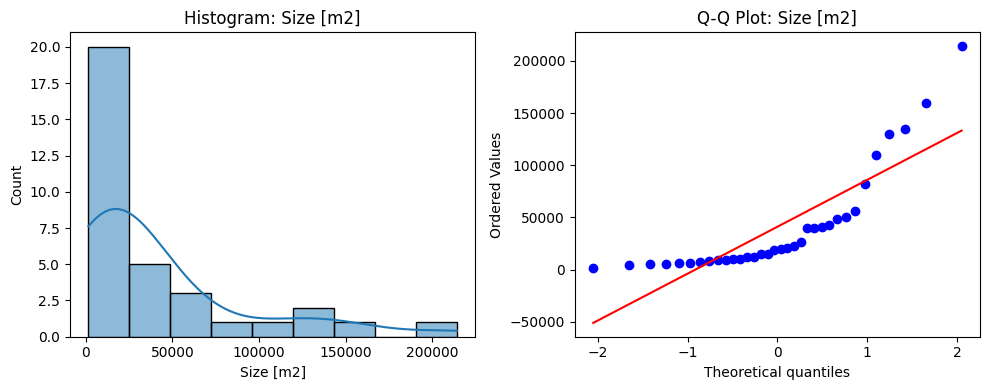


--- Rate per m2 [€] ---
Shapiro-Wilk statistic = 0.8323, p-value = 0.0001156
Not normally distributed (p <= 0.05).


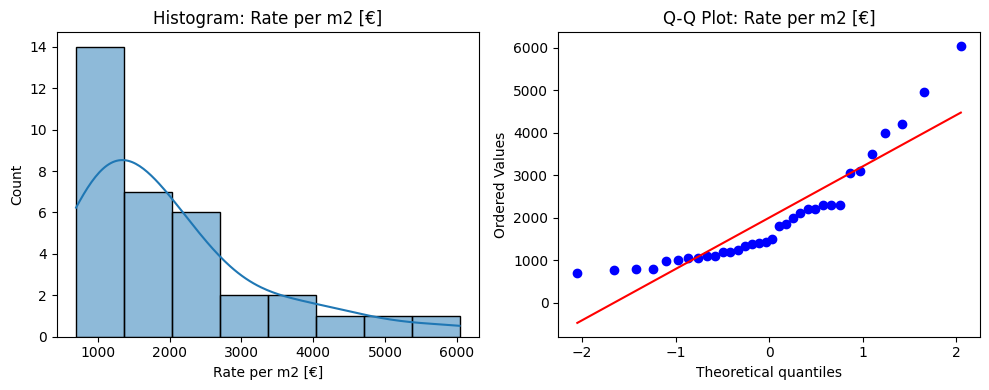


--- Duration [years] ---
Shapiro-Wilk statistic = 0.9087, p-value = 0.007874
Not normally distributed (p <= 0.05).


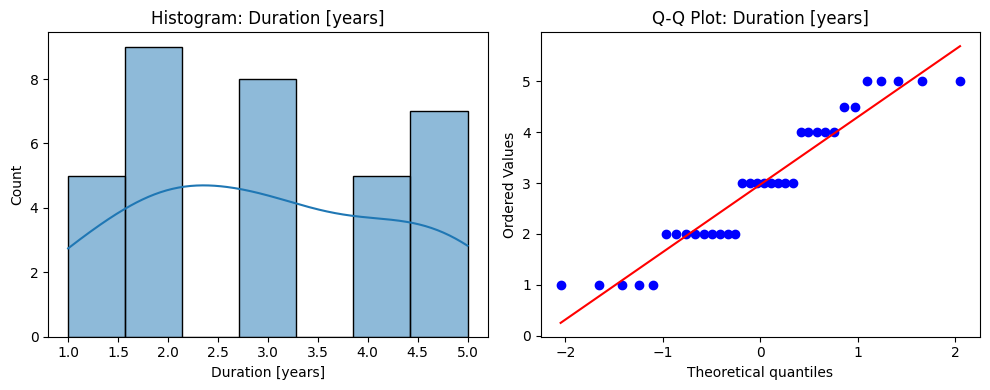


--- Initial budget [€] ---
Shapiro-Wilk statistic = 0.6078, p-value = 2.471e-08
Not normally distributed (p <= 0.05).


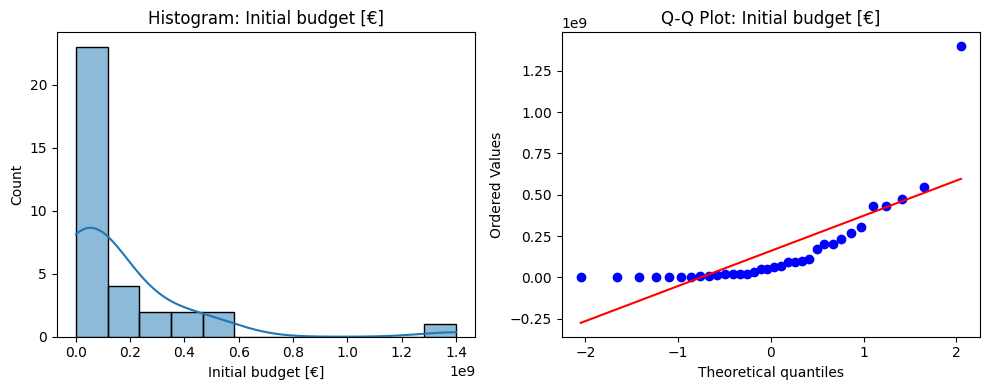


--- Exceeded ---
Shapiro-Wilk statistic = 0.6365, p-value = 5.953e-08
Not normally distributed (p <= 0.05).


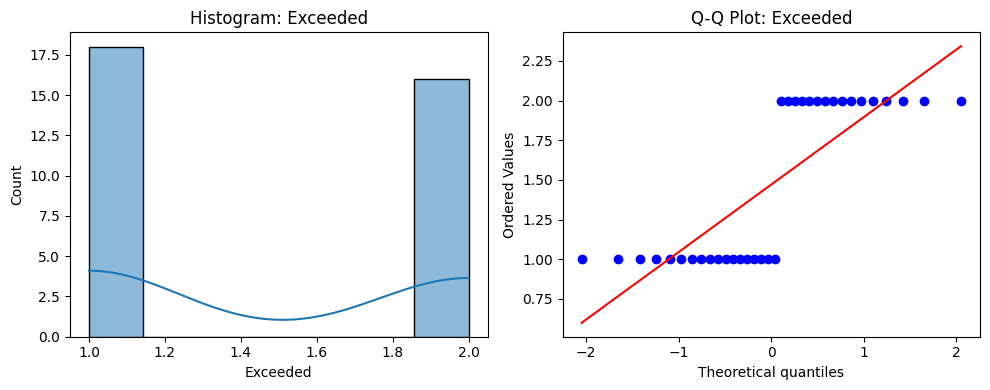


--- Complexity ---
Shapiro-Wilk statistic = 0.7671, p-value = 6.282e-06
Not normally distributed (p <= 0.05).


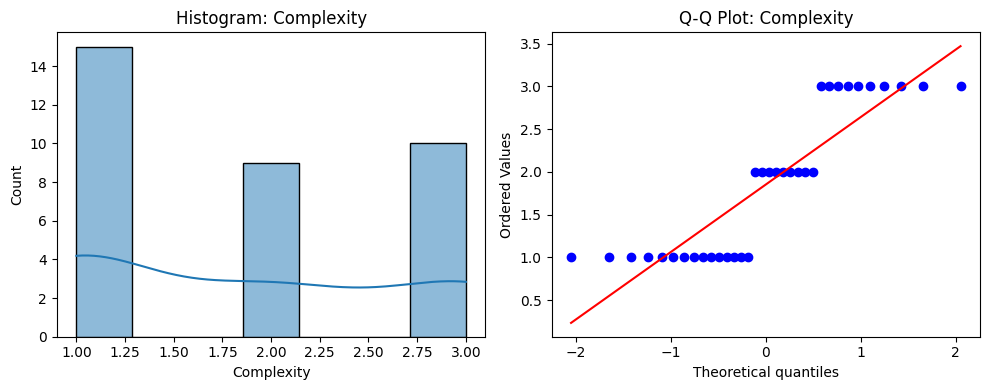


--- No. of Architects ---
Shapiro-Wilk statistic = 0.9065, p-value = 0.006857
Not normally distributed (p <= 0.05).


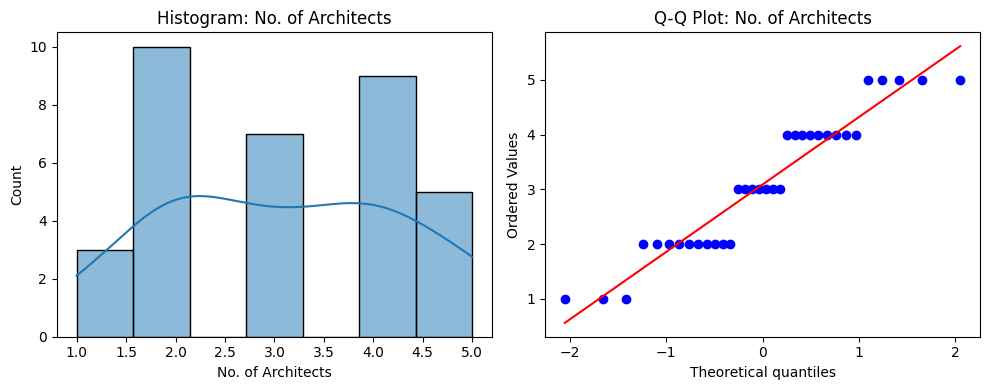


--- Design phase time [months] ---
Shapiro-Wilk statistic = 0.8148, p-value = 5.031e-05
Not normally distributed (p <= 0.05).


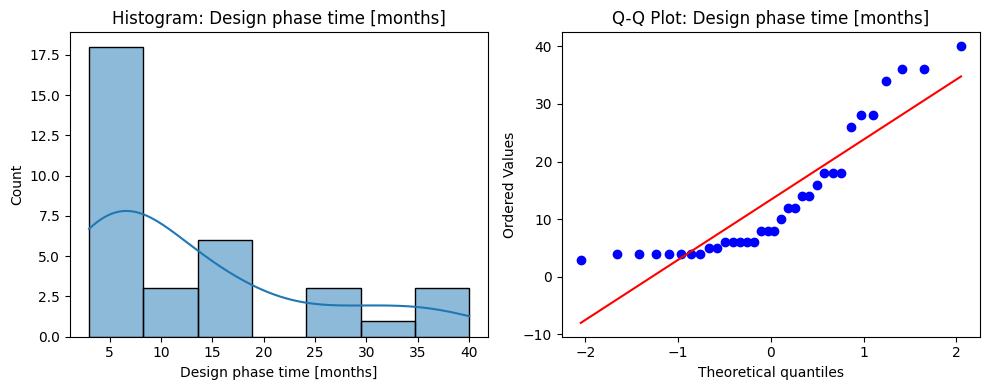


--- Design phase time [hours] ---
Shapiro-Wilk statistic = 0.8148, p-value = 5.031e-05
Not normally distributed (p <= 0.05).


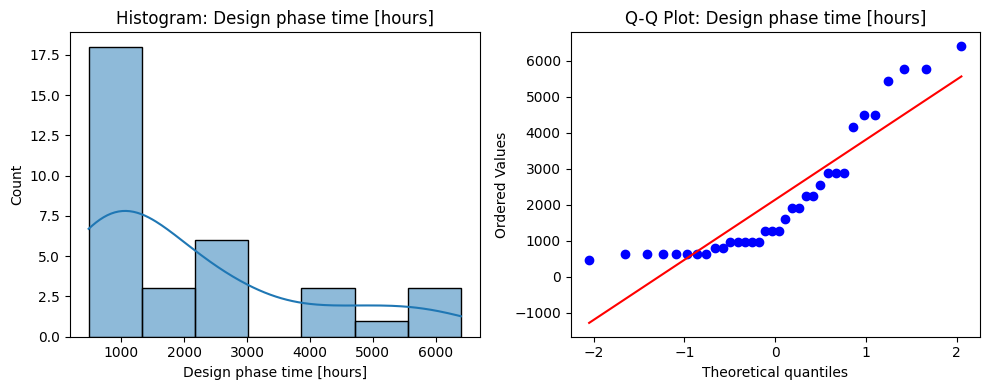


--- k (arc) - value ---
Shapiro-Wilk statistic = 0.6713, p-value = 1.839e-07
Not normally distributed (p <= 0.05).


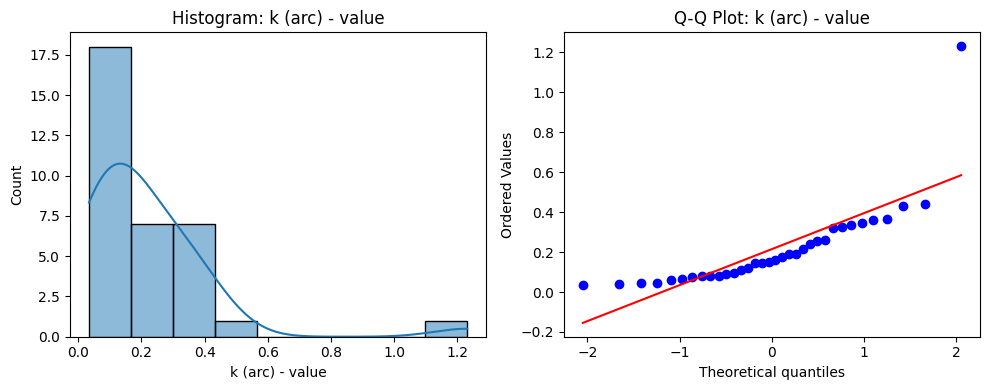


--- No. of Civil Engineers ---
Shapiro-Wilk statistic = 0.9132, p-value = 0.01046
Not normally distributed (p <= 0.05).


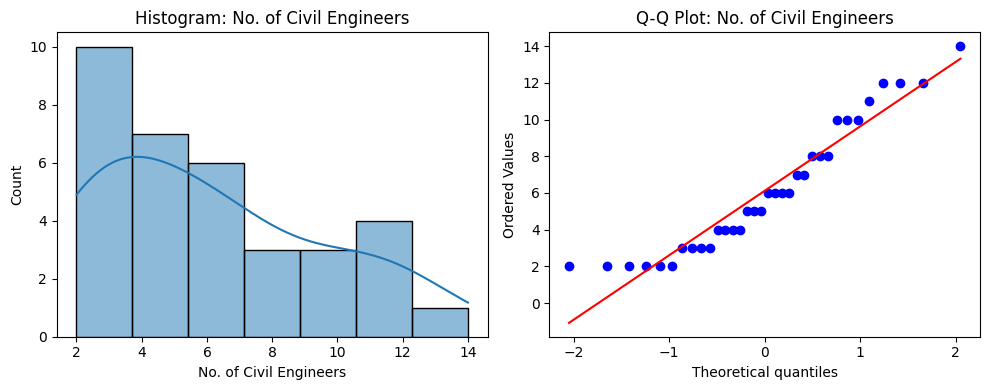


--- Construction design time [months] ---
Shapiro-Wilk statistic = 0.9109, p-value = 0.009033
Not normally distributed (p <= 0.05).


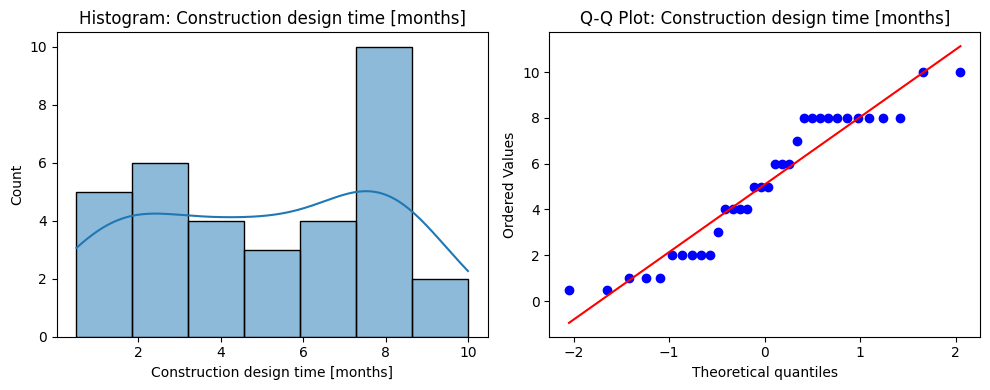


--- Construction design time [hours] ---
Shapiro-Wilk statistic = 0.9109, p-value = 0.009033
Not normally distributed (p <= 0.05).


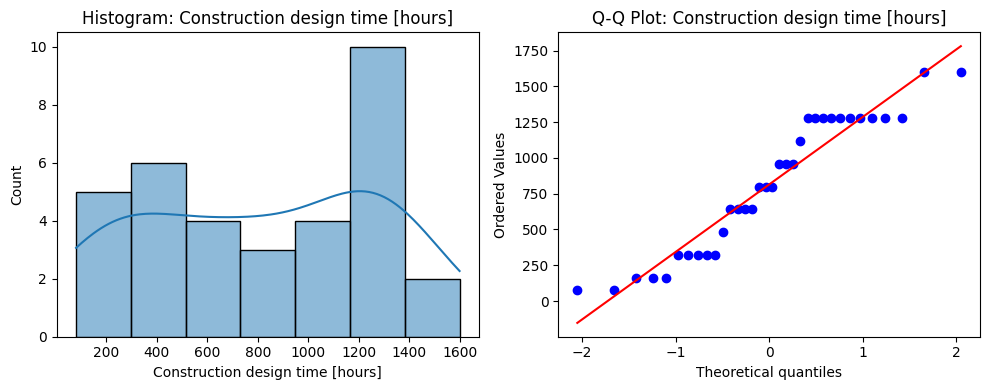


--- k (ce) - value ---
Shapiro-Wilk statistic = 0.4484, p-value = 3.548e-10
Not normally distributed (p <= 0.05).


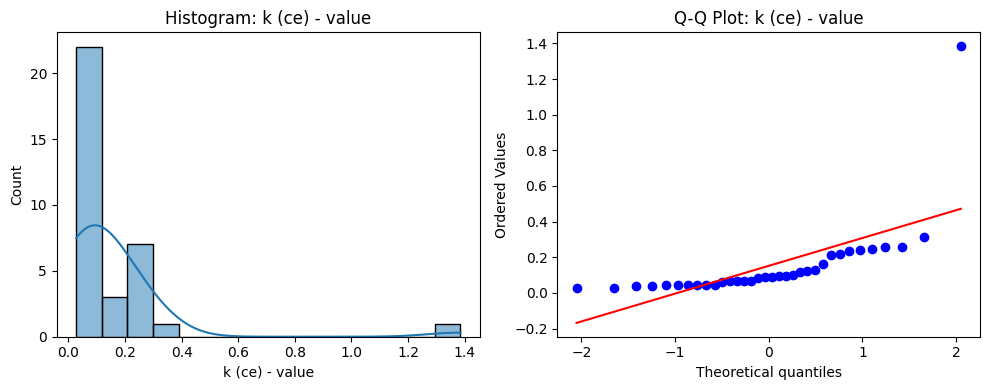


--- No. of Const. workers ---
Shapiro-Wilk statistic = 0.6838, p-value = 2.799e-07
Not normally distributed (p <= 0.05).


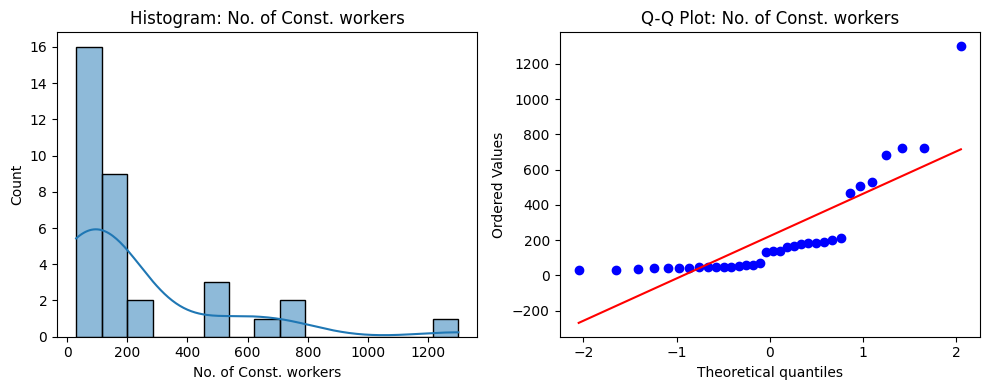


--- Working hours [months] ---
Shapiro-Wilk statistic = 0.9467, p-value = 0.09748
Likely normally distributed (p > 0.05).


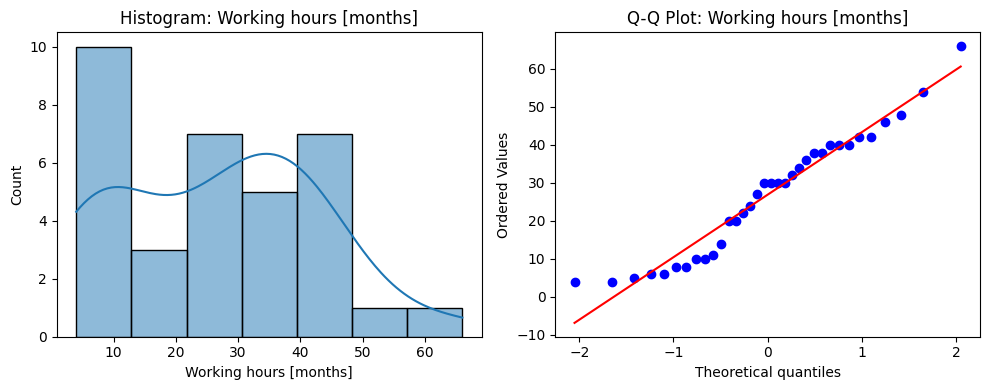


--- Working hours [hours] ---
Shapiro-Wilk statistic = 0.8988, p-value = 0.004257
Not normally distributed (p <= 0.05).


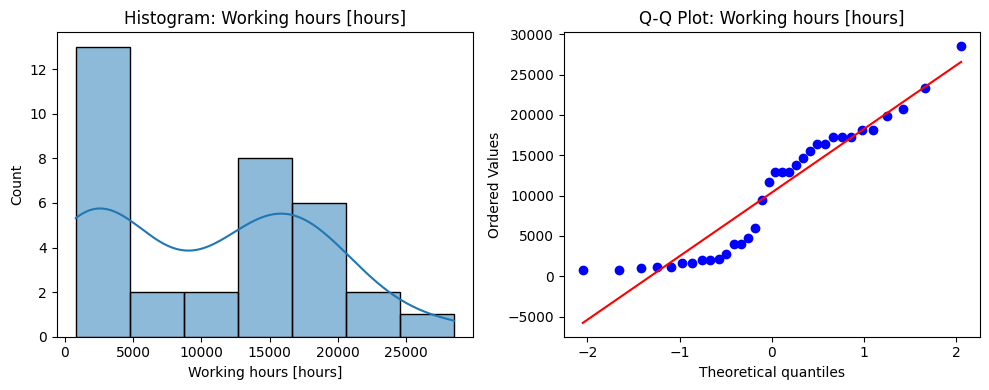


--- m2/hour per one worker ---
Shapiro-Wilk statistic = 0.8913, p-value = 0.002729
Not normally distributed (p <= 0.05).


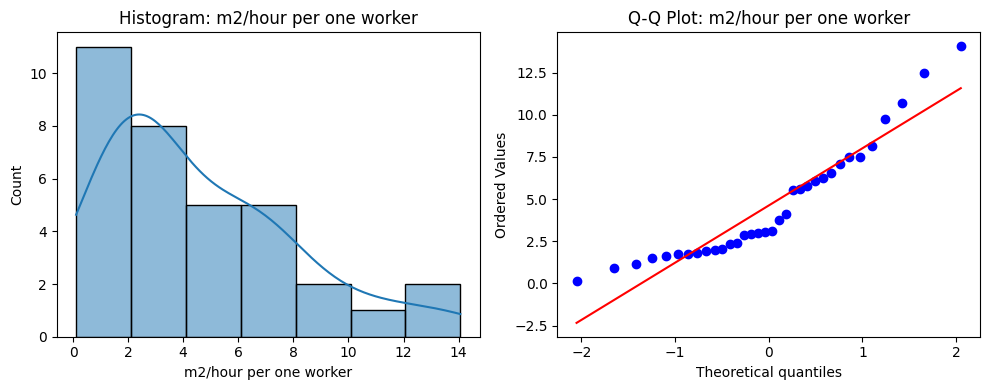

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

#Converting object columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# Only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for column in numeric_cols:
    clean_data = df[column].dropna()

    print(f"\n--- {column} ---")
    if len(clean_data) < 3:
        print("Not enough data for Shapiro-Wilk test.")
        continue

    # Shapiro-Wilk test
    stat, p_value = stats.shapiro(clean_data)
    print(f"Shapiro-Wilk statistic = {stat:.4f}, p-value = {p_value:.4g}")

    if pd.isna(p_value):
        print("NaN result — possibly due to constant values or extreme issues.")
    elif p_value > 0.05:
        print("Likely normally distributed (p > 0.05).")
    else:
        print("Not normally distributed (p <= 0.05).")

    # Ploting histogram and Q-Q plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(clean_data, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram: {column}')

    stats.probplot(clean_data, dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot: {column}')

    plt.tight_layout()
    plt.show()